In [18]:
from google.colab import files
myfile = files.upload()

Saving input.txt to input.txt


In [19]:
f = open(file='/content/input.txt')
line = f.readline()
num_process = 0
while line:
  process = line.split(' ')
  print(process[0],process[1],process[2])
  
  line = f.readline()
  num_process = num_process+1

print(num_process)

311 19 358

21 14 32

478 9 495

221 12 249

283 20 324

268 20 274

375 18 380

309 14 350

393 12 430

129 9 161

127 14 141

321 15 359

86 19 130

388 16 391

227 24 240

201 23 219

215 24 235

213 21 226

387 13 394

74 17 110

54 19 69

430 15 435

46 13 84

37 13 73

293 23 326

394 16 409

3 5 3

178 15 208

348 6 365

114 20 117
30


In [20]:
f2 = open(file='/content/input.txt')
line = f2.readline()
arr = [[0]*4 for i in range(num_process)]

while line:
  for i in range(0,num_process):
    for j in range(0,3):
      arr[i][0] = i
      process = line.split(' ')
      arr[i][j+1] = process[j].strip()
    line = f2.readline()

for i in range(0, num_process):
  for j in range(0, 4):
    arr[i][j] = int(arr[i][j])

arr.sort(key=lambda x: x[1])

print(arr)

[[26, 3, 5, 3], [1, 21, 14, 32], [23, 37, 13, 73], [22, 46, 13, 84], [20, 54, 19, 69], [19, 74, 17, 110], [12, 86, 19, 130], [29, 114, 20, 117], [10, 127, 14, 141], [9, 129, 9, 161], [27, 178, 15, 208], [15, 201, 23, 219], [17, 213, 21, 226], [16, 215, 24, 235], [3, 221, 12, 249], [14, 227, 24, 240], [5, 268, 20, 274], [4, 283, 20, 324], [24, 293, 23, 326], [7, 309, 14, 350], [0, 311, 19, 358], [11, 321, 15, 359], [28, 348, 6, 365], [6, 375, 18, 380], [18, 387, 13, 394], [13, 388, 16, 391], [8, 393, 12, 430], [25, 394, 16, 409], [21, 430, 15, 435], [2, 478, 9, 495]]


In [21]:
w_time = 0
for k in range(0,num_process):
  w_time = w_time + arr[k][2]

print(w_time)

478


In [22]:
time_quantum = int(input('time_quantum : '))
print(time_quantum)

time_quantum : 14
14


time quantum :  14
[[(266, 14), (487, 5)], [(6, 14)], [(381, 9)], [(184, 12)], [(224, 14), (469, 6)], [(210, 14), (462, 6)], [(300, 14), (496, 4)], [(252, 14)], [(341, 12)], [(119, 9)], [(105, 14)], [(280, 14), (493, 1)], [(76, 14), (404, 5)], [(327, 14), (502, 2)], [(196, 14), (451, 10)], [(142, 14), (421, 9)], [(170, 14), (439, 10)], [(156, 14), (431, 7)], [(314, 13)], [(61, 14), (400, 3)], [(46, 14), (394, 5)], [(367, 14), (509, 1)], [(33, 13)], [(20, 13)], [(238, 14), (476, 9)], [(353, 14), (506, 2)], [(0, 5)], [(128, 14), (419, 1)], [(294, 6)], [(91, 14), (410, 6)]]


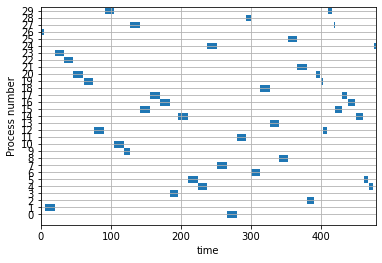

In [23]:
# Importing the matplotlb.pyplot
import matplotlib.pyplot as plt
  
# Declaring a figure "gnt"
fig, gnt = plt.subplots()
  
# Setting Y-axis limits
gnt.set_ylim(0, 10*(num_process+1))
  
# Setting X-axis limits
gnt.set_xlim(0, w_time+1)
  
# Setting labels for x-axis and y-axis
gnt.set_xlabel('time')
gnt.set_ylabel('Process number')

num_arr = [0]*num_process  
for i in range(0,num_process):
  num_arr[i] = i

tick_arr = [0]*num_process
for j in range(0,num_process):
  tick_arr[j] = 15+10*j

# Setting ticks on y-axis
gnt.set_yticks(tick_arr)
# Labelling tickes of y-axis
gnt.set_yticklabels(num_arr)
  
# Setting graph attribute
gnt.grid(True)

# print(arr)
print("time quantum : ", time_quantum)


arr_time = [[] for _ in range(num_process)]
i = 0

while i < w_time:
  for p in arr:
    if p[2] > time_quantum:
      arr_time[p[0]].append((i, time_quantum))
      i += time_quantum
      p[2] -= time_quantum
    elif 0 < p[2] <= time_quantum:
      arr_time[p[0]].append((i, p[2]))
      i += p[2]
      p[2] = 0
    
    if p[1] < i:
      i += 1
      
print(arr_time)



for i in range(0,num_process):
  # print(arr_time[i])
  gnt.broken_barh(arr_time[i],(10+10*i, 9))


  
plt.savefig("gantt.png")